Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

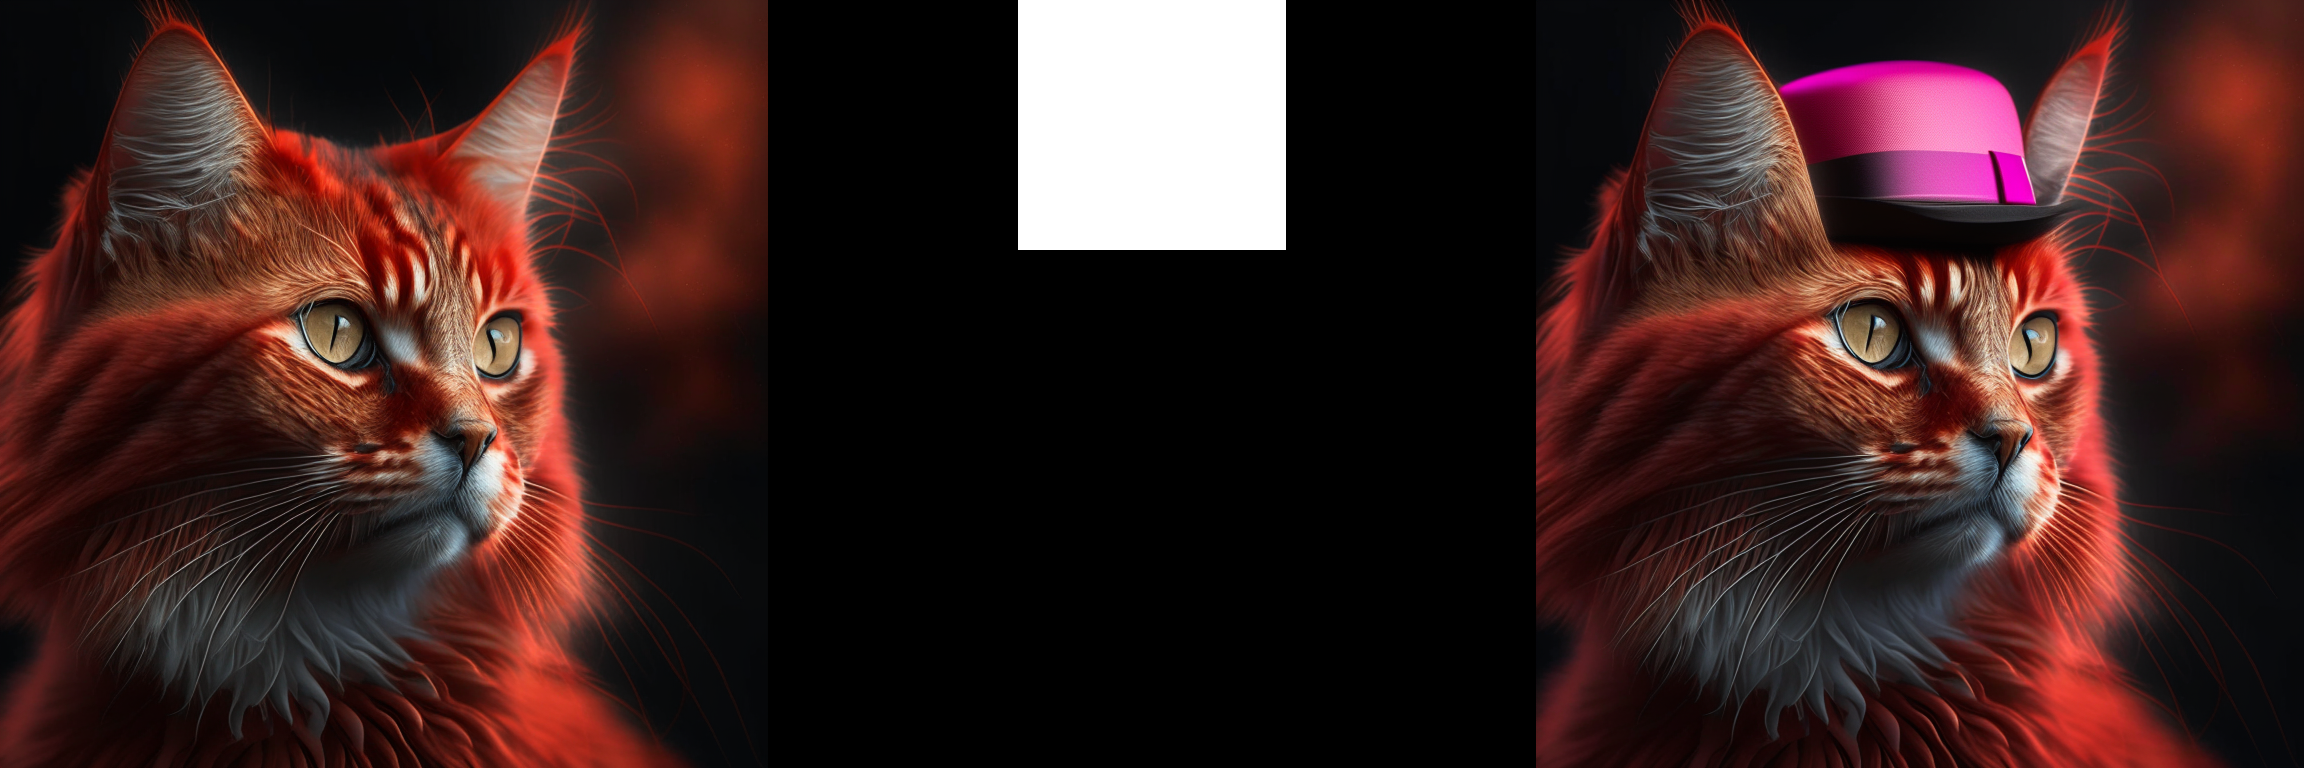

In [3]:
from diffusers import KandinskyV22InpaintPipeline, KandinskyV22PriorPipeline
from diffusers.utils import load_image, make_image_grid
import torch
import numpy as np
from PIL import Image

prior_pipeline = KandinskyV22PriorPipeline.from_pretrained("kandinsky-community/kandinsky-2-2-prior", torch_dtype=torch.float16, use_safetensors=True).to("cuda")
pipeline = KandinskyV22InpaintPipeline.from_pretrained("kandinsky-community/kandinsky-2-2-decoder-inpaint", torch_dtype=torch.float16, use_safetensors=True).to("cuda")

init_image = load_image("https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/kandinsky/cat.png")
mask = np.zeros((768, 768), dtype=np.float32)
# mask area above cat's head
mask[:250, 250:-250] = 1

prompt = "a hat"
negative_prompt = "white"
generator = torch.Generator()
generator.manual_seed(52)

prior_output = prior_pipeline(
    prompt=prompt,
    negative_prompt=negative_prompt,
    generator=generator
    )
output_image = pipeline(image=init_image, 
                        mask_image=mask, 
                        **prior_output, 
                        height=768, 
                        width=768, 
                        num_inference_steps=50,
                        # strength=0.1,
                        generator=generator).images[0]

mask = Image.fromarray((mask*255).astype('uint8'), 'L')
make_image_grid([init_image, mask, output_image], rows=1, cols=3)

In [4]:
from PIL.ImageOps import invert
from utils import *

In [13]:
init_image = center_crop_and_resize(Image.open("/home/mlfavorfit/Downloads/sample/composition/1_enh.jpg").convert("RGB"))
mask = invert(Image.open("/home/mlfavorfit/Downloads/sample/composition/1_mask.jpg").convert("L"))
mask = center_crop_and_resize(mask)

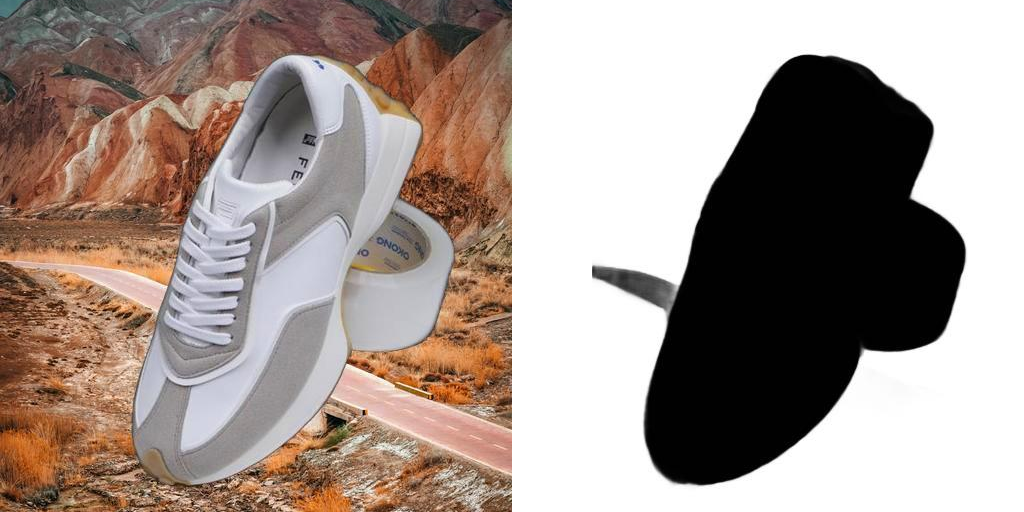

In [14]:
make_image_grid([init_image, mask], rows=1, cols=2)

In [15]:
import random

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

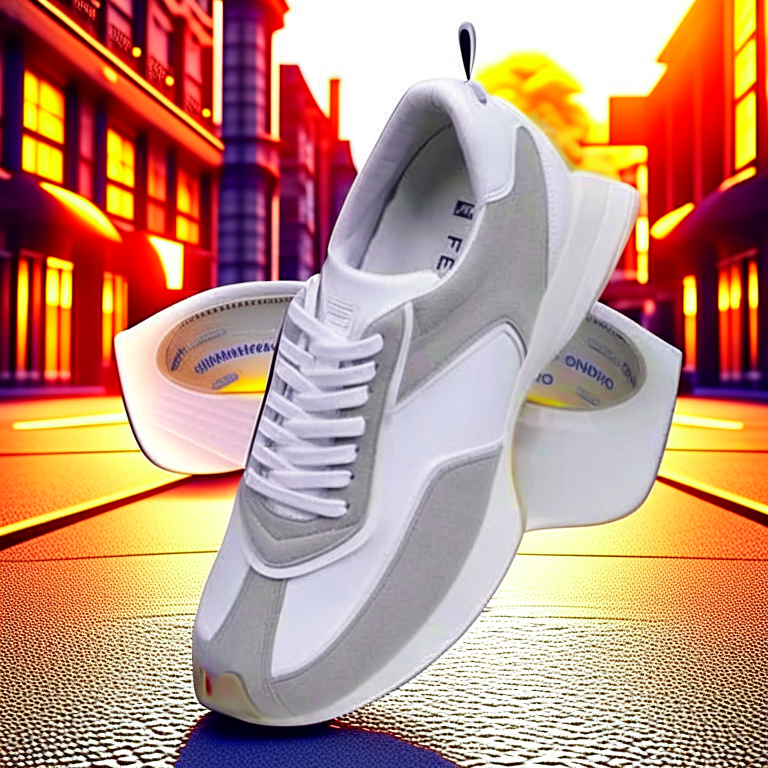

In [38]:
prompt = "a pair of white sneakers on a road, futuristic balenciaga sneakers, sneaker design, inflatable future shoes, futuristic sneakers, 1 : 1 brutal design, jonathan zawada, stylish shoe design, 1 : 1 hyper illustration, beeple. hyperrealism, smoth 3 d illustration, smoth 3d illustration, vektroid album cover"
negative_prompt = "low quality, worst quality, wrinkled, deformed, distorted, jpeg artifacts,nsfw, paintings, sketches, text, watermark, username, spikey"

generator = torch.Generator()
generator.manual_seed(random.randint(0, 10000))

prior_output = prior_pipeline(
    prompt=prompt,
    negative_prompt=negative_prompt,
    generator=generator
    )
output_image = pipeline(image=init_image, 
                        mask_image=mask, 
                        **prior_output, 
                        height=768,
                        width=768, 
                        num_inference_steps=20,
                        strength=0.8,
                        generator=generator).images[0]

output_image

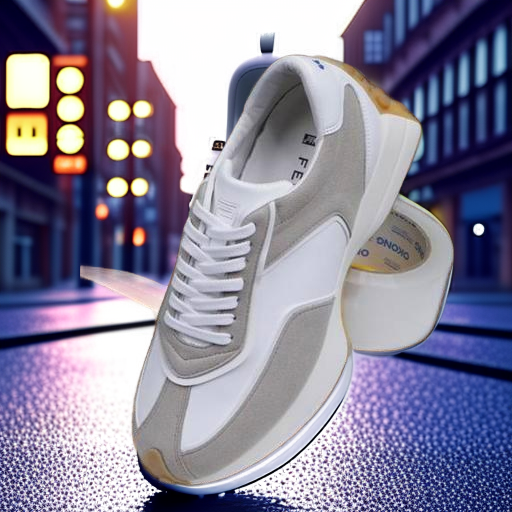

In [30]:
composing_image(init_image,output_image, mask.convert("RGB"))

In [1]:
from diffusers import StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline
import torch

base = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16"
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/mlfavorfit/lib/favorfit/kjg/diffusers_research/diffusers_research/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
/home/mlfavorfit/lib/favorfit/kjg/diffusers_research/diffusers_research/diffusers/models/lora.py:387: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [11]:
import random
generator = torch.Generator()
generator.manual_seed(random.randint(0, 10000))

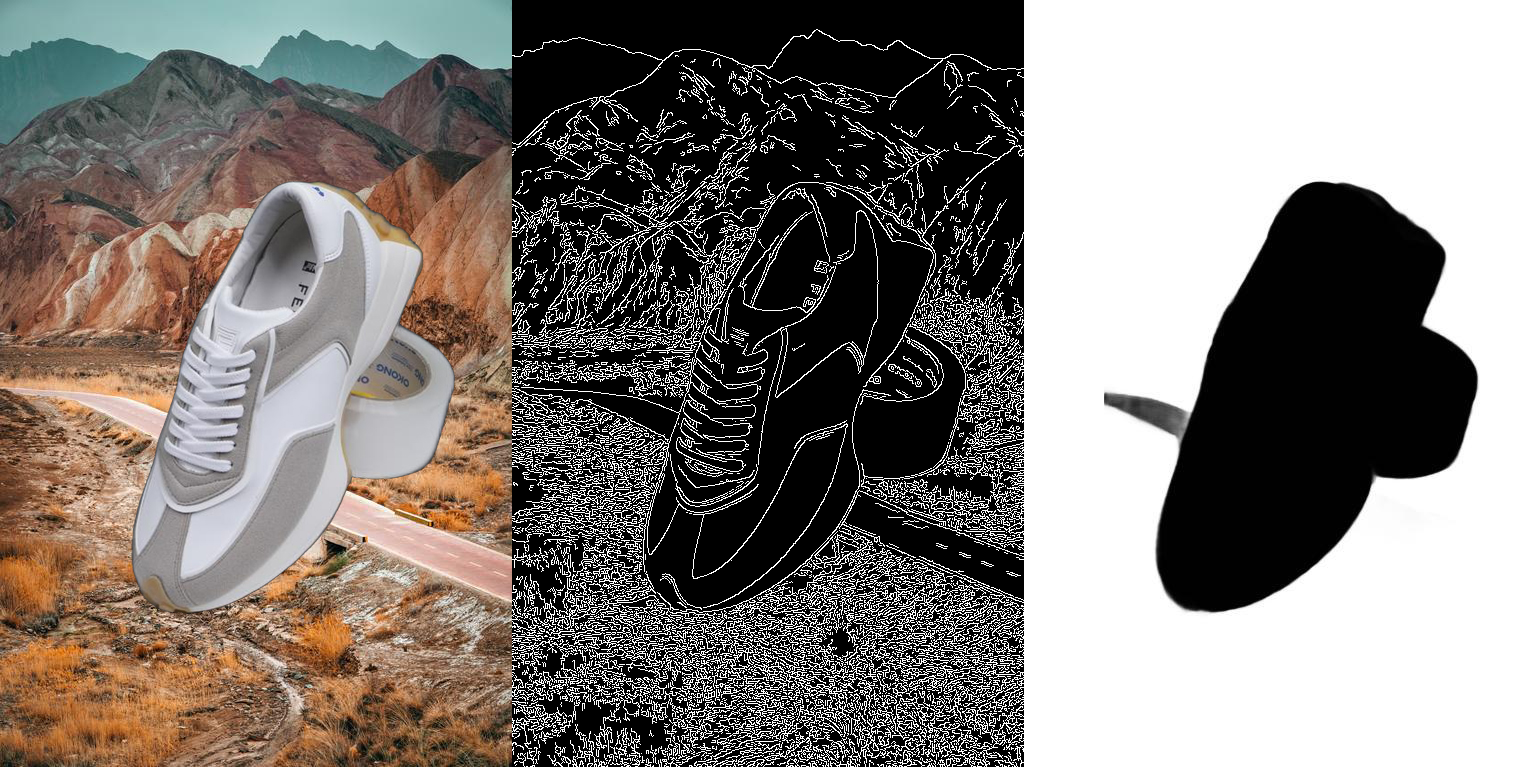

In [17]:
from diffusers import StableDiffusionXLControlNetPipeline, ControlNetModel, AutoencoderKL, StableDiffusionXLControlNetImg2ImgPipeline
from diffusers.utils import load_image, make_image_grid
from PIL import Image, ImageOps
import cv2
import numpy as np
import torch

original_image = Image.open("/home/mlfavorfit/Downloads/sample/composition/1_comb.jpg")
image = np.array(original_image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

mask_image = ImageOps.invert(Image.open("/home/mlfavorfit/Downloads/sample/composition/1_mask.jpg"))

make_image_grid([original_image, canny_image, mask_image], rows=1, cols=3)